In [1]:
from matplotlib import pyplot as plt
import torch
from torch import nn

### Data Prep

In [4]:
### known params (weights and biases)
weight = 0.7
bias = 0.3

### data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias


In [7]:
print(f"X shape : {X.shape}")
print(f"X size : {X.size()}")
print(f"Number of samples : {len(X)}")

X shape : torch.Size([50, 1])
X size : torch.Size([50, 1])
Number of samples : 50


In [8]:
print(f"First 10 samples of X and Y")
print("X :", X[:10])
print("y :", y[:10])

First 10 samples of X and Y
X : tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y : tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [14]:
### train and test split 80 and 20 %
train_split = int(0.8*(len(X)))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train))
print(len(X_test))

40
10


In [15]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10,7))

    #train data
    plt.scatter(train_data,train_labels,c = "b",s = 4,label = "training data")
    
    #test data
    plt.scatter(test_data,test_labels,c = "g",s = 4,label = "test data")

    #predictions if there are:
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",s=4,label = "Predictions")

    plt.legend()
    plt.show()
    

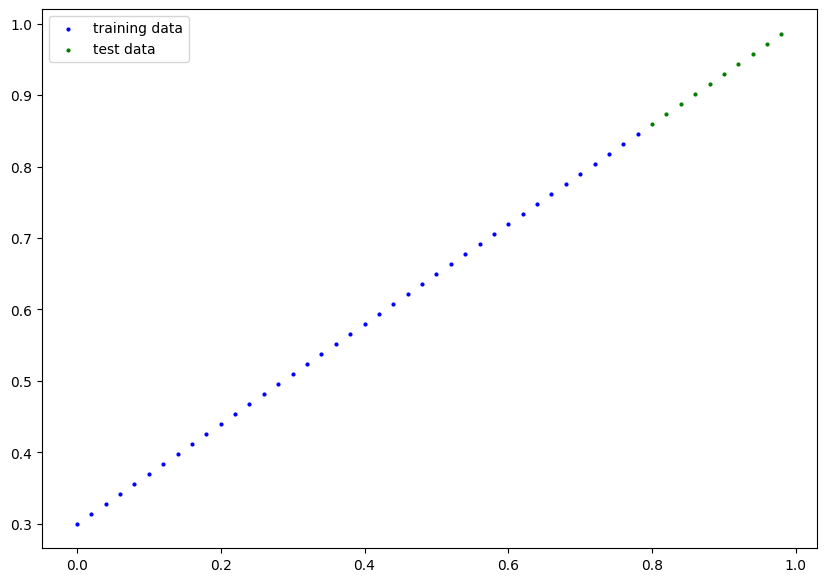

In [16]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=None)

### Linear Regression Model

In [17]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    

    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias  ### linear regression


### Instantiate the model

In [25]:
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([1.0473], requires_grad=True),
 Parameter containing:
 tensor([-1.5868], requires_grad=True)]

In [26]:
model.state_dict()

OrderedDict([('weights', tensor([1.0473])), ('bias', tensor([-1.5868]))])

### Training the loop (the best part)
* we need to define a loss function
* an optimizer
* setup a lr(learning rate)
* the whole idea for a model to move from some unkonw para to somes known para OR in another words poor to better representation of the data
* one way to measure how poor or how wrong predictions are to use a loss function
* Loss/Cost functions quantify the performance of machine-learning (ML) models by comparing their predictions to ground truth values.
* things we need to train:
* a loss fn measures how wrong models predictions are compared to ideal outputs.
* optimizer takes into account the loss of a model and adjusts the models parameters (weigths and biases) to improve the loss fn and

In [27]:
### setup loss fn
loss_fn = nn.L1Loss()

### setup optimizer
optimizer = torch.optim.SGD(params = model.parameters(), 
                            lr = 0.01)#learning rate = most important learning hyperparameter that we set it will change values as 0.0x for 0.1 -> 0.x

In [28]:
### now our goal is to train the trainable params which are weights and bias (for our model)
### we need to train our model to get as close to these biases
print(f"Weight : {weight}")
print(f"Bias : {bias}")

Weight : 0.7
Bias : 0.3


### Train loop
need to run many times to actually fit

In [33]:
epochs = 500
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

    model.train() # -> set model to train mode

    #1. forward pass
    y_pred = model(X_train)

    #2. calculate loss
    loss = loss_fn(y_pred,y_train) # model_pred,target
    print(f"loss :  {loss}")

    #3. Optimizer zero grad : #how the opti will accumulate through the loop we have to zero them in this step
    optimizer.zero_grad()

    #4. backpropagation
    loss.backward()

    #5. optimizer.step (perform gradient descent)
    optimizer.step()

    ### now test set to eval mode
    model.eval()

    with torch.inference_mode(): # turn off grad tracking
        test_pred = model(X_test) # forward pass

        #calculate loss
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss_values)
            test_loss_values.append(test_loss_values)
            print(f"Epoch : {epoch} | Loss:  {loss} | Test Loss: {test_loss}")

        #print state dict
        print(model.state_dict())

loss :  0.0036550797522068024
Epoch : 0 | Loss:  0.0036550797522068024 | Test Loss: 0.012627387419342995
OrderedDict([('weights', tensor([0.7095])), ('bias', tensor([0.3042]))])
loss :  0.007865902036428452
OrderedDict([('weights', tensor([0.7056])), ('bias', tensor([0.2942]))])
loss :  0.0036550797522068024
OrderedDict([('weights', tensor([0.7095])), ('bias', tensor([0.3042]))])
loss :  0.007865902036428452
OrderedDict([('weights', tensor([0.7056])), ('bias', tensor([0.2942]))])
loss :  0.0036550797522068024
OrderedDict([('weights', tensor([0.7095])), ('bias', tensor([0.3042]))])
loss :  0.007865902036428452
OrderedDict([('weights', tensor([0.7056])), ('bias', tensor([0.2942]))])
loss :  0.0036550797522068024
OrderedDict([('weights', tensor([0.7095])), ('bias', tensor([0.3042]))])
loss :  0.007865902036428452
OrderedDict([('weights', tensor([0.7056])), ('bias', tensor([0.2942]))])
loss :  0.0036550797522068024
OrderedDict([('weights', tensor([0.7095])), ('bias', tensor([0.3042]))])
lo

In [37]:
with torch.inference_mode():
    y_pred_new = model(X_test)

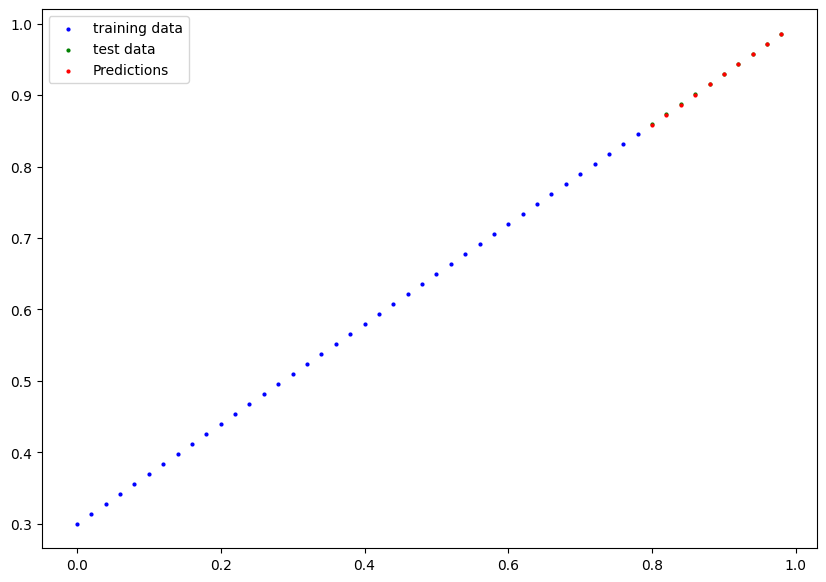

In [38]:
plot_predictions(X_train, y_train, X_test, y_test,predictions=y_pred_new)